<a href="https://colab.research.google.com/github/anshulbhute/Machine-Learning-Lab/blob/main/Prac3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, mean_absolute_error,
                             mean_squared_error)
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df = pd.read_csv("customer_churn.csv")  # Replace with actual dataset

# Preprocessing
X = df.drop(columns=["Churn"])  # Features
y = df["Churn"]  # Target
X = pd.get_dummies(X, drop_first=True)

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Classification Model (Random Forest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]


In [7]:
# Classification Metrics
print("Classification Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Regression Model (Predicting churn probability)
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
y_reg_pred = reg.predict(X_test)

Classification Metrics:
Accuracy: 0.8500
Precision: 0.8571
Recall: 0.1875
F1-score: 0.3077
ROC-AUC: 0.8313
Confusion Matrix:
[[147   1]
 [ 26   6]]



Regression Metrics:
MAE: 0.1305
MSE: 0.1018
RMSE: 0.3190


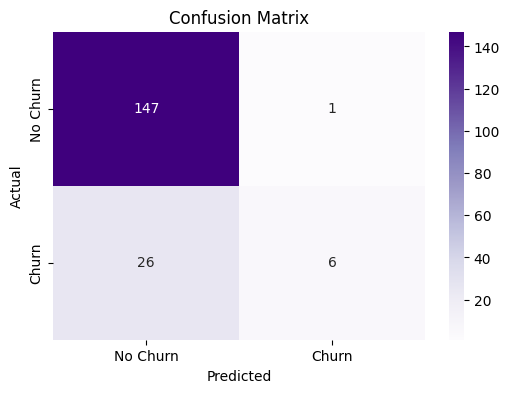

In [13]:
# Regression Metrics
mae = mean_absolute_error(y_test, y_reg_pred)
mse = mean_squared_error(y_test, y_reg_pred)
rmse = np.sqrt(mse)

print("\nRegression Metrics:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# Visualization: Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()